<div class="alert alert-block alert-info">
Author:<br>Felix Gonzalez, P.E. <br> Adjunct Instructor, <br> Division of Professional Studies <br> Computer Science and Electrical Engineering <br> University of Maryland Baltimore County <br> fgonzale@umbc.edu
</div>

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import re

This notebook provides an overview of the Pandas module. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It is part of the Anaconda distribution. When working with tabular data, such as data stored in spreadsheets or databases, Pandas is the right tool (assuming not so large files). Pandas help us to explore, clean, and process our data. 

In Pandas, a data table is called a DataFrame. Pandas supports the integration with many file formats or data sources out of the box (e.g., csv, Excel, SQL, json). Importing data from each of these data sources is provided by a "read" function while to to store data it uses a "write" function.

Documentation References:
- https://pandas.pydata.org/
- https://pandas.pydata.org/docs/user_guide/index.html

# Table of Contents
[Dataframe Object](#Dataframe-Object)

[Creating a Dataframe](#Creating-a-Dataframe)

[Data Types](#Data-Types)

[Importing or Loading Data](#Importing-or-Loading-Data)

[Visualizing Large Dataframes](#Visualizing-Large-Dataframes)

[Exporting Data](#Exporting-Data)

[Data Selection Methods](#Data-Selection-Methods)

[Derived Features, Loops, and Apply Functions](#Derived-Features,-Loops,-and-Apply-Functions)

[Data Filtering](#Data-Filtering)

[Drop/Remove Feature/Column or Record/Row](#Drop/Remove-Feature/Column-or-Record/Row)

[Extracting Data from Dataframes](#Extracting-Data-from-Dataframes)

[Adding or removing a row](#Adding-or-removing-a-row)

[Merging Concatenating and Joining Dataframes](#Merging-Concatenating-and-Joining-Dataframes)

[Sorting data by column values](#Sorting-data-by-column-values)

[Sorting data by Index](#Sorting-data-by-Index)

[Transpose a Dataframe](#Transpose-a-Dataframe)

[Dataframe Index Considerations](#Dataframe-Index-Considerations)

[MultiIndex and Advanced Indexing](#MultiIndex-and-Advanced-Indexing)

# Dataframe Object
[Return to Table of Contents](#Table-of-Contents)

In Pandas a table of data is called a dataframe. DataFrame is a 2-dimensional labeled data structure with columns (also called features) of potentially different types.  Along the second dimension you have rows (i.e., records) which are indexed. 

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe.svg" width="600">

Dataframes accept various kinds of inputs such as:
- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data you can optionally pass an index and column names.

Documentation References:
- https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe

#### Pandas Series

Pandas series are a one-dimensional n-dimensional array with axis labels (including time series). They are a data collection within Pandas similar to a Numpy array.

Documentation References
- https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series

In [2]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
series_data = pd.Series([1, 3, 5, np.nan, 6, 8])
print(type(series_data))
series_data

<class 'pandas.core.series.Series'>


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
list_data = [1, 3, 5, np.nan, 6, 8]
print(type(list_data))
list_data

<class 'list'>


[1, 3, 5, nan, 6, 8]

In [4]:
array_data = np.array(list_data)
print(type(array_data))
array_data

<class 'numpy.ndarray'>


array([ 1.,  3.,  5., nan,  6.,  8.])

In [5]:
series_list_data =  pd.Series(list_data)
print(type(series_list_data))
series_list_data

<class 'pandas.core.series.Series'>


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

# Creating a Dataframe
[Return to Table of Contents](#Table-of-Contents)

Creating a dataframe (from array or list data). Note that a location can have not only values but also lists and/or dictionaries.

In [6]:
# Creating a dataframe from series data.
df = pd.DataFrame(data = series_data, columns=list('A'))
df

,A
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


In [7]:
# Creating a dataframe from list data.
df = pd.DataFrame(data = list_data, columns=list('A'))
df

,A
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


In [8]:
# Creating a dataframe from array data.
df = pd.DataFrame(data = array_data, columns=list('A'))
df

,A
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


In [9]:
# Say we have the following data in list format.
f_names = ['Victor', 'Katherine', 'Carolyn', 'Ruth', 'Derek', 'Alex']
l_names = ['Kramer', 'Newcomb', 'Dias', 'Ohare', 'Raynes', 'Murphy']
birth_dates = ['1/4/1956', '5/3/1996', '12/23/2011', '3/26/1975', '11/27/2001', '7/13/2010']
credit_scores = [530, 453, 800, 781, 702, np.nan]
annual_income = [55000, 101000, 0, 124000, 85000, 89000]
total_liabilities = [10000, 5000, 0, 25000, 17000, 19000]

In [10]:
# To add a column I can name the column using df['name_of_column'] and point to the data.
df['first_name'] = f_names
df

,A,first_name
0,1.0,Victor
1,3.0,Katherine
2,5.0,Carolyn
3,NaN,Ruth
4,6.0,Derek
5,8.0,Alex


In [11]:
# We can rename columns using the rename function.
df.rename(columns={"A": "col_A",
                   "first_name": "f_name"})

,col_A,f_name
0,1.0,Victor
1,3.0,Katherine
2,5.0,Carolyn
3,NaN,Ruth
4,6.0,Derek
5,8.0,Alex


In [12]:
# Creating a DataFrame from dict data objects. Note how we create the index and column names
# Using the dictionary from HW2 lets convert it to a dataframe.
data_dictionary = {'first_name': f_names,
                   'last_name': l_names,
                   'birth_date': birth_dates,
                   'credit_score': credit_scores,
                  }
data_dictionary

{'first_name': ['Victor', 'Katherine', 'Carolyn', 'Ruth', 'Derek', 'Alex'],
 'last_name': ['Kramer', 'Newcomb', 'Dias', 'Ohare', 'Raynes', 'Murphy'],
 'birth_date': ['1/4/1956',
  '5/3/1996',
  '12/23/2011',
  '3/26/1975',
  '11/27/2001',
  '7/13/2010'],
 'credit_score': [530, 453, 800, 781, 702, nan]}

In [13]:
# I can put the dictionary variable in teh data parameter and the columns to be used are they dictionary keys.
# Note that the index order in the lists was kept into the dataframe.
df_names = pd.DataFrame(data = data_dictionary, columns= data_dictionary.keys())
df_names

,first_name,last_name,birth_date,credit_score
0,Victor,Kramer,1/4/1956,530.0
1,Katherine,Newcomb,5/3/1996,453.0
2,Carolyn,Dias,12/23/2011,800.0
3,Ruth,Ohare,3/26/1975,781.0
4,Derek,Raynes,11/27/2001,702.0
5,Alex,Murphy,7/13/2010,NaN


In [14]:
# Can use the Insert() function to insert a column of data.
df_names.insert(loc = 3, column = 'total_liabilities', value = total_liabilities)
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score
0,Victor,Kramer,1/4/1956,10000,530.0
1,Katherine,Newcomb,5/3/1996,5000,453.0
2,Carolyn,Dias,12/23/2011,0,800.0
3,Ruth,Ohare,3/26/1975,25000,781.0
4,Derek,Raynes,11/27/2001,17000,702.0
5,Alex,Murphy,7/13/2010,19000,NaN


In [15]:
# We can add a column with by specifying the new column and the data.
df_names['annual_income'] = annual_income # Specifying a previously defined list.
df_names['gender'] = ['M', 'F', 'F', 'F', 'M', 'M'] # Specifying the list of values.
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Victor,Kramer,1/4/1956,10000,530.0,55000,M
1,Katherine,Newcomb,5/3/1996,5000,453.0,101000,F
2,Carolyn,Dias,12/23/2011,0,800.0,0,F
3,Ruth,Ohare,3/26/1975,25000,781.0,124000,F
4,Derek,Raynes,11/27/2001,17000,702.0,85000,M
5,Alex,Murphy,7/13/2010,19000,NaN,89000,M


Note that in most cases we would not be manually specifiying values in a dataframe but we would load it from some source in order to analyze it. If the lenght of the list of data is longer than the lenght of the dataframe you will get a "ValueError: Lenght of values does not match lenght of index".

In [16]:
# Df can be converted to dictionary.
# There are various types of orientations (list, dict, series, split, etc.)
# The list orientation converts the df2 back to our initial dictionary form.
df_names.to_dict(orient='list')

{'first_name': ['Victor', 'Katherine', 'Carolyn', 'Ruth', 'Derek', 'Alex'],
 'last_name': ['Kramer', 'Newcomb', 'Dias', 'Ohare', 'Raynes', 'Murphy'],
 'birth_date': ['1/4/1956',
  '5/3/1996',
  '12/23/2011',
  '3/26/1975',
  '11/27/2001',
  '7/13/2010'],
 'total_liabilities': [10000, 5000, 0, 25000, 17000, 19000],
 'credit_score': [530.0, 453.0, 800.0, 781.0, 702.0, nan],
 'annual_income': [55000, 101000, 0, 124000, 85000, 89000],
 'gender': ['M', 'F', 'F', 'F', 'M', 'M']}

In [17]:
# Df can be converted to JSON as well as exported to other datafiles like CSV or xlsx.  
# To convert to json we can use dataframe.to_json.
# In this case it is using the index or row as the orientation. JSON orientations include index, split, records, table.
# Note that in any case all outputs are dictionaries.
df_names.to_json(orient="index")

'{"0":{"first_name":"Victor","last_name":"Kramer","birth_date":"1\\/4\\/1956","total_liabilities":10000,"credit_score":530.0,"annual_income":55000,"gender":"M"},"1":{"first_name":"Katherine","last_name":"Newcomb","birth_date":"5\\/3\\/1996","total_liabilities":5000,"credit_score":453.0,"annual_income":101000,"gender":"F"},"2":{"first_name":"Carolyn","last_name":"Dias","birth_date":"12\\/23\\/2011","total_liabilities":0,"credit_score":800.0,"annual_income":0,"gender":"F"},"3":{"first_name":"Ruth","last_name":"Ohare","birth_date":"3\\/26\\/1975","total_liabilities":25000,"credit_score":781.0,"annual_income":124000,"gender":"F"},"4":{"first_name":"Derek","last_name":"Raynes","birth_date":"11\\/27\\/2001","total_liabilities":17000,"credit_score":702.0,"annual_income":85000,"gender":"M"},"5":{"first_name":"Alex","last_name":"Murphy","birth_date":"7\\/13\\/2010","total_liabilities":19000,"credit_score":null,"annual_income":89000,"gender":"M"}}'

In [18]:
# The columns function gives a index of the column labels or names.
df_names.columns

Index(['first_name', 'last_name', 'birth_date', 'total_liabilities',
       'credit_score', 'annual_income', 'gender'],
      dtype='object')

# Data Types
[Return to Table of Contents](#Table-of-Contents)

In most cases we may want to know how is Python/Pandas treating the data in a column. We may want to know what type of data it has and perhaps convert a few of them if Python did not detect it properly. If Python did not detect it properly it may be indication that the column has mixed data types and we may need to be address the issue and clean the data. 

In [19]:
# The .dtypes show the type of data in the columns in the dataframe.
df_names.dtypes

first_name            object
last_name             object
birth_date            object
total_liabilities      int64
credit_score         float64
annual_income          int64
gender                object
dtype: object

In [20]:
# The .info() function shows a little more information on the dataframe columns
df_names.info()
# Note that the birth_date is detected as an object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_name         6 non-null      object 
 1   last_name          6 non-null      object 
 2   birth_date         6 non-null      object 
 3   total_liabilities  6 non-null      int64  
 4   credit_score       5 non-null      float64
 5   annual_income      6 non-null      int64  
 6   gender             6 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 468.0+ bytes


In [21]:
# The birth_date is detected as an object and not a datetime
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df_names['birth_date'] = pd.to_datetime(df_names['birth_date'])
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F
2,Carolyn,Dias,2011-12-23,0,800.0,0,F
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M


In [22]:
df_names.info()
# Note that birth_dates are now a datetime dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_name         6 non-null      object        
 1   last_name          6 non-null      object        
 2   birth_date         6 non-null      datetime64[ns]
 3   total_liabilities  6 non-null      int64         
 4   credit_score       5 non-null      float64       
 5   annual_income      6 non-null      int64         
 6   gender             6 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 468.0+ bytes


In [23]:
# To_numeric, as the name implies converts data to_numeric (integer or float)
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# In this case we don't need to convert anything else.

# Importing or Loading Data
[Return to Table of Contents](#Table-of-Contents)

Pandas Data Loading (e.g., xlsx, csv, json)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/02_io_readwrite.svg" width="800">

To load a file Pandas has a read function. Function varies by type of file but generally is in the format of pd.read_csv, pd.read_excel.  Note that there are a lot of parameters for each of the read functions. Some important parameters include: 

- __parse_dates__: if a column is known to have dates you can specify and Python will attempt to read as datetime data type.
- __keep_default_na__: True or False. If false, need to specify values under the na_values parameter.
- __Na_values__: may need to be reviewed as some datasets may include an accronym. Pandas defaul NA or Null values are: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '< NA >', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'. However, in some datasets excercise caution, for example 'NA' may be an abbreviation for 'North America' and if the default na_values are kept Python will read NA as null value.

Important parameter for JSON includes the "orient".

If you notice special characters in text data it may be due to Encoding. Encoding is an important parameter when loading CSV or exporting XLSX. If the wrong encoding is used may result in special or unreadable characters in the outputs for those columns that have text data. When loading Excel Files Encoding "cp1252" or "utf-8-sig" should be used so that Excel does not create special characters. Standard Python is utf-8. See reference for explanation (https://stackoverflow.com/questions/57061645/why-is-%C3%82-printed-in-front-of-%C2%B1-when-code-is-run).
 
In later classes we will explore how import SQL data as a dataframe. In this notebooks all files to be imported/loaded are located under the input_data folder.  
    
Documentation References:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html

In [24]:
# Loading a CSV file use pd.read_csv
# Lets open a CSV file under the input_data folder using the pd.read_csv.
df_auto = pd.read_csv('./input_data/Auto.csv')
df_auto#.head() # The .head() function shows only the top 5 rows by default.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [25]:
df_auto.shape # Shape function gives a tuple of two elements, the number of rows and number of columns.

(397, 9)

In [26]:
# Loading EXCEL file: use pd.read_excel.
df_weatherMDdaily = pd.read_excel('.\input_data\weatherMDdaily.xlsx')
df_weatherMDdaily.head(10) # The .head() can specify how many rows to show.
# However, for sufficiently large dataframes Python may limit what to show.

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,44,34,0,0,0
1,2013-01-02,37,26,0,0,0
2,2013-01-03,38,22,0,0,0
3,2013-01-04,42,23,0,0,0
4,2013-01-05,43,31,T,0,0
5,2013-01-06,51,28,T,0,0
6,2013-01-07,47,27,0,0,0
7,2013-01-08,52,23,0,0,0
8,2013-01-09,51,27,T,0,0
9,2013-01-10,53,36,0,0,0


In [27]:
df_weatherMDdaily.shape

(365, 6)

In [28]:
# Loading JSON File: use pd.read_json
df_states = pd.read_json('./input_data/states.json',
                        orient = 'columns')
df_states.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [29]:
df_states.shape

(51, 3)

# Visualizing Large Dataframes
[Return to Table of Contents](#Table-of-Contents)

When loading large datasets Python decides has a default set_options that it uses to show a sample of the rows and columns. The parameters can be changed using the pandas.set_option() function. To see all rows you can set the st_option as follows towards the beginning of the Notebook:

- pandas.set_option('max_row', None)

However, note that this may freeze the Jupyter Notebook if the dataframe is too large and would exercise caution. Another option is to use the .head() function with None as faollows:

- dataframe.head(None)

Similarly to setint the set_option for the max_rows the max_columns can also be changed as follows:

- pd.set_option('display.max_columns', None)

Very rarely a dataframe has too many columns and in rare instances will cause issues. In all cases this changes the default values for the Notebook and need to be defined towards the beginning of the Notebook.

In [30]:
#pd.set_option('max_row', None) # Use with caution read above.

In [31]:
#pd.set_option('display.max_columns', None) # Use with caution read above.

In [32]:
#dataframe_name.head(None) # Use with caution read above.

# Exporting Data
[Return to Table of Contents](#Table-of-Contents)

Similarly to importing there is a Pandas function to export a dataframe into various formats. In this notebooks all exported files are saved under the output_data folder. 

Documentation References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html

In [33]:
# To export dataframe as CSV file. This creates the df_names.csv in the output_data folder
df_names.to_csv (r'.\output_data\df_names.csv', 
                 encoding = 'utf-8-sig', 
                 index = False, header=True) 

In [34]:
# To export dataframe as Excel xlsx file. This creates the df_names.xlsx in the output_data folder.
# Note that the name of the dataframe does not have to be the same name as the exported file.
df_names.to_excel (r'.\output_data\df_names_2.xlsx', 
                  encoding = 'cp1252',
                  index = False, header=True)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [35]:
# Before exporting a JSON file you may need to explore which orientation you want.
df_names.to_json(orient="columns")

'{"first_name":{"0":"Victor","1":"Katherine","2":"Carolyn","3":"Ruth","4":"Derek","5":"Alex"},"last_name":{"0":"Kramer","1":"Newcomb","2":"Dias","3":"Ohare","4":"Raynes","5":"Murphy"},"birth_date":{"0":-441590400000,"1":831081600000,"2":1324598400000,"3":165024000000,"4":1006819200000,"5":1278979200000},"total_liabilities":{"0":10000,"1":5000,"2":0,"3":25000,"4":17000,"5":19000},"credit_score":{"0":530.0,"1":453.0,"2":800.0,"3":781.0,"4":702.0,"5":null},"annual_income":{"0":55000,"1":101000,"2":0,"3":124000,"4":85000,"5":89000},"gender":{"0":"M","1":"F","2":"F","3":"F","4":"M","5":"M"}}'

In [36]:
# To Export dataframe as JSON file. This creates the df_names.json in the output_data folder
df_names.to_json (r'.\output_data\df_names.json', 
                  orient = "columns")

# Data Selection Methods
[Return to Table of Contents](#Table-of-Contents)

Pandas includes various functions to select data within a dataframe. These functions include .loc, .iloc, .at, and .iat which use label and position. Another method is to use slicing. The selected data can be redefined as a new dataframe using the .copy() function.

- loc: label based indexing and will raise error if the item is not found
- iloc: position based indexing and will raise an error if the indexer is out-of-bounds.
- at: works with individuals. label based
- iat: works with individuals. position based

__Why indexing data?__

- Identifying observations
- Allows intuitive filtering and subsetting

Documentation Reference:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html


In [37]:
# To show data selection, we will use the df_names.
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F
2,Carolyn,Dias,2011-12-23,0,800.0,0,F
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M


#### Method Column Reference

In [38]:
# Selecting data from a single column.
df_names['first_name'] # This method works for column names that have and dont have spaces.
# This exports the data as a series.

0       Victor
1    Katherine
2      Carolyn
3         Ruth
4        Derek
5         Alex
Name: first_name, dtype: object

In [39]:
df_names.first_name # For columns names that dont use spaces you can also use this method.
# This exports the data as a series.

0       Victor
1    Katherine
2      Carolyn
3         Ruth
4        Derek
5         Alex
Name: first_name, dtype: object

In [40]:
# The type of the output of selecting the column data is a series.
type(df_names.first_name)

pandas.core.series.Series

In [42]:
# Selecting data from a single column.
df_names[['first_name']] # This selection method (using the double bracket) exports the column data as a dataframe. 

,first_name
0,Victor
1,Katherine
2,Carolyn
3,Ruth
4,Derek
5,Alex


#### Method .loc 
Can select a slice of values (i.e., rows and/or combination of rows) or a single. The .loc uses the name of the row index and name of the column.

In [43]:
# For getting a cross section using a label. 
df_names.loc[1] # Data from the row in index 1.
# The output here is not a dataframe but a pandas series. Observe the display format is different to the dataframe .

first_name                     Katherine
last_name                        Newcomb
birth_date           1996-05-03 00:00:00
total_liabilities                   5000
credit_score                       453.0
annual_income                     101000
gender                                 F
Name: 1, dtype: object

In [44]:
# To check the type.
type(df_names.loc[1])

pandas.core.series.Series

In [45]:
# Selecting on a multi-axis by label:
df_names.loc[:, ['annual_income', 'credit_score']]
# The output of this slice is another dataframe. Note the output display format. 

,annual_income,credit_score
0,55000,530.0
1,101000,453.0
2,0,800.0
3,124000,781.0
4,85000,702.0
5,89000,NaN


In [46]:
type(df_names.loc[:, ['annual_income', 'credit_score']])

pandas.core.frame.DataFrame

In [47]:
# Selecting on a multi-axis by row indexes 1 thru 3 and column labels.
df_names.loc[1:4, ['annual_income', 'credit_score']]

,annual_income,credit_score
1,101000,453.0
2,0,800.0
3,124000,781.0
4,85000,702.0


In [48]:
# Same slicing methods as lists apply. In this case starting at 0 every other row.
df_names.loc[0::2, ['annual_income', 'credit_score']]

,annual_income,credit_score
0,55000,530.0
2,0,800.0
4,85000,702.0


In [49]:
# Single value selection with .loc.
df_names.loc[1, 'annual_income'] # Type will depend in the type that Python/Pandas detected for the column.

101000

#### Method .iloc 
Can select a slice of values (i.e., rows and/or combination of rows) or a single. The .loc uses the row index and column index.

In [50]:
# Select via the position of the passed integers:
df_names.iloc[3] # Data from index 3. The output is a pandas series.

first_name                          Ruth
last_name                          Ohare
birth_date           1975-03-26 00:00:00
total_liabilities                  25000
credit_score                       781.0
annual_income                     124000
gender                                 F
Name: 3, dtype: object

In [51]:
# By integer slices, acting similar to numpy/python:
# Before the comma is the row index slice, after the comma is the column index slice.
# Data from columns in index 1 thru 3.
df_names.iloc[:,1:4]
# The output is a dataframe.

,last_name,birth_date,total_liabilities
0,Kramer,1956-01-04,10000
1,Newcomb,1996-05-03,5000
2,Dias,2011-12-23,0
3,Ohare,1975-03-26,25000
4,Raynes,2001-11-27,17000
5,Murphy,2010-07-13,19000


In [52]:
# Data from rows in index 1 thru 3 and columns in index 1 thru 3.
df_names.iloc[1:4, 0:2]

,first_name,last_name
1,Katherine,Newcomb
2,Carolyn,Dias
3,Ruth,Ohare


In [53]:
# For getting a single value in the specified location.
df_names.iloc[1, 5]

101000

#### Method .at
Can select a single value. The .at uses the name of the row index and name of the column. Described as a "Fast label-based scalar accessor" in the documentation is potentially faster than the .loc or .iloc methods when accessing single values.

Documentation References:
- https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.at.html#pandas.DataFrame.at

In [54]:
# Access a specific value using labels
df_names.at[1, 'annual_income']

101000

#### Method .iat
Can select a single value. The .at uses the row index and column index. Described as a "Fast label-based scalar accessor" in the documentation is potentially faster than the .loc or .iloc methods when accessing single values.

In [55]:
# Access a specific value using indexes.
df_names.iat[1, 4]

453.0

# Derived Features, Loops, and Apply Functions
[Return to Table of Contents](#Table-of-Contents)

In some cases we may want to derive a feature or create a new column from existing columns. There are various ways to accomplish this. Either using = or using .apply function when we have a defined function or we can iterate and loop thru the values and loops.

In [56]:
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_name         6 non-null      object        
 1   last_name          6 non-null      object        
 2   birth_date         6 non-null      datetime64[ns]
 3   total_liabilities  6 non-null      int64         
 4   credit_score       5 non-null      float64       
 5   annual_income      6 non-null      int64         
 6   gender             6 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 468.0+ bytes


#### Derived feature method 1: Using Apply function

In [57]:
df_names.head(2) # Only shows two rows.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F


In [58]:
# This function converts given date to age
# Note that the funciton is a simplistic way to estimate the age.
# It is not taking into account Leap years and is not exact
def age(birth_day):
    return int((date.today() - datetime.date(birth_day)).days/365)

In [59]:
df_names['age'] = df_names['birth_date'].apply(age) 
# Note that the age function has one parameter and the value of the column is used as the age function input parameter.
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13


In [60]:
# Dataframe.cumsum returns cumulative sum over a DataFrame or Series axis.
# cumulative sum - vertical
df_names[['annual_income']].apply(np.cumsum)

,annual_income
0,55000
1,156000
2,156000
3,280000
4,365000
5,454000


In [61]:
# cumulative sum - horizontal
df_names[['total_liabilities', 'annual_income']].apply(np.cumsum, axis=1)

,total_liabilities,annual_income
0,10000,65000
1,5000,106000
2,0,0
3,25000,149000
4,17000,102000
5,19000,108000


#### Derived feature method 2: Specifying value for the new column

In [62]:
df_names["liability_income_ratio"] = df_names["total_liabilities"]/df_names["annual_income"] 
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483


#### Derivied Feature method 3: Using loops

In [63]:
for r in range(len(df_names)):
    # First check if the cell value is nan in order to avoid a division by 0.
    # Note that in this case you cannot do cell vallue == np.nan. It will not work.
    if (pd.isna(df_names.at[r, "annual_income"])) or (df_names.at[r, "annual_income"] == 0):
        df_names.at[r, "liability_income_pct"] = np.nan
    else:
        df_names.at[r, "liability_income_pct"] = 100*df_names.at[r,"total_liabilities"]/df_names.at[r,"annual_income"]

df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


# Data Filtering
[Return to Table of Contents](#Table-of-Contents)

There are various methods to filter data in a dataframe. These may depend on the type of data within the column. If it is numeric or text data. This section will provide various examples of functions that can be used with different types of data. You can use filtering using conditional functions, logical operators, isin, null, query function, and others. 

Note that in some cases there may be the need to use some functions like the .copy() or the reset_index() when the filtered data will be defined as a new dataframe object. Note that there may be cases when we may not want to reset the index or we may want to add the original index as a column in the new dataframe.

Documentation References:
- https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html

- NumPy also implements comparison operators such as < (less than) and > (greater than) as element-wise universal functions. 
- The result of these comparison operators is always an array with a Boolean data type.

[Comparison Operators as ufuncs - DataScienceHandbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Comparison-Operators-as-ufuncs)

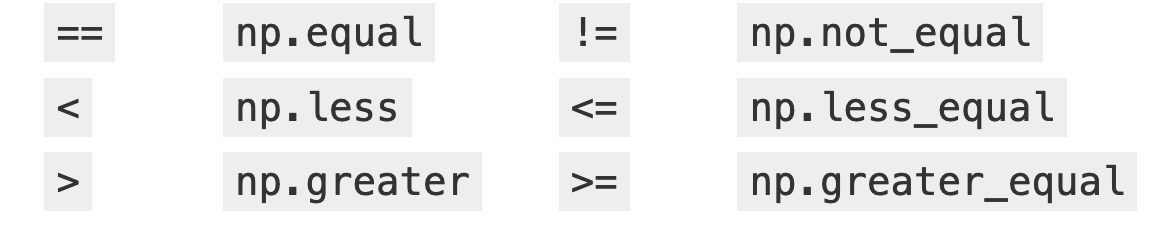

[Boolean Operators](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html#Boolean-operators)

operator|function
-----| -----
`&` | 'and' operator
`\|` | 'or' operator
`\~` | 'not' operator
`\^` | 'xor' operator

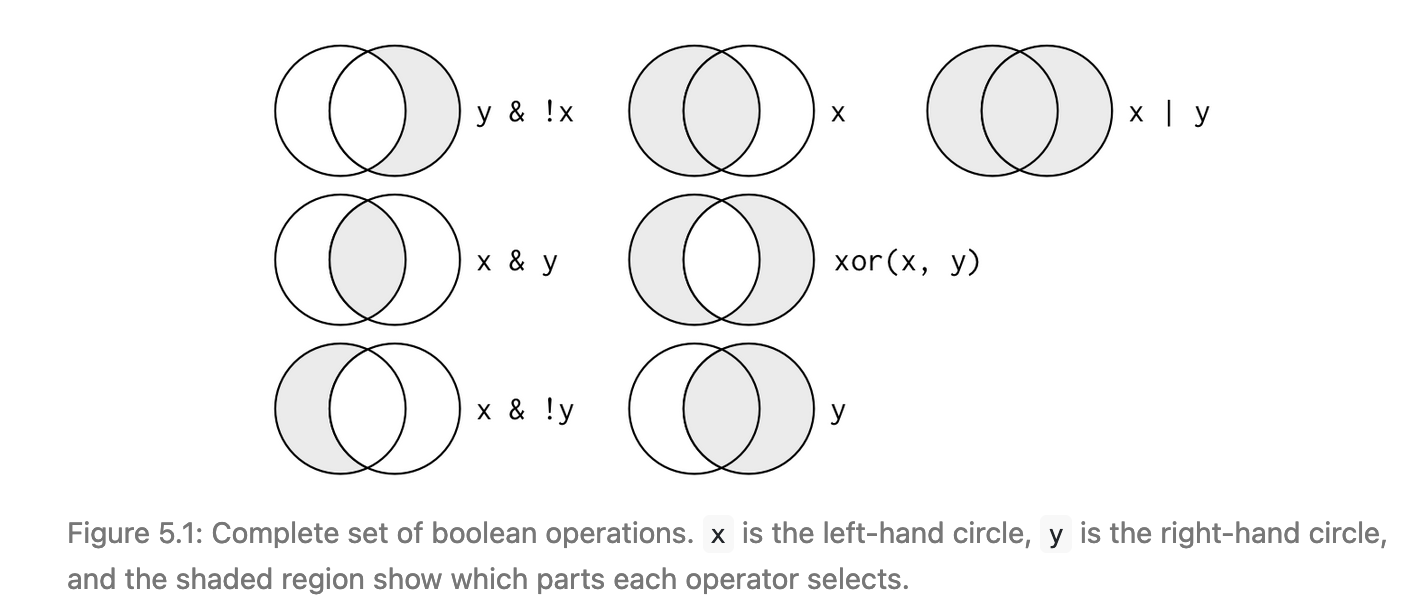

#### Conditional and logical operators

In [64]:
# Filtering numeric columns using conditionals
df_names.loc[df_names['annual_income'] >= 80000] # Rows where the condition is true are shown.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [65]:
# The ~ negates the condition and can be used in most filtering.
df_names.loc[~(df_names['annual_income'] >= 80000)] # Rows where the condition is true are shown.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN


In [66]:
# If we wanted to make this a new dataframe recommend copy and reseting the index like this:
df_names_high_income = df_names.loc[df_names['annual_income'] >= 80000].copy().reset_index(drop = True)
df_names_high_income

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
1,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
2,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
3,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [67]:
# Setting drop to False will keep the original index as a new column in case you want to keep it.
df_names_high_income = df_names.loc[df_names['annual_income'] >= 80000].copy().reset_index(drop = False)
df_names_high_income

,index,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
1,3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
2,4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
3,5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [68]:
# Filtering multiple conditions with '&'. Note that 'and' does not work.
# Recall that in the if statements and/or are have different meaning to & and |.
df_names.loc[(df_names['annual_income'] >= 80000) &
             (df_names['total_liabilities'] <= 20000)] # Rows where the conditions are true are shown.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [69]:
# Filtering multiple conditions with '|'. Note that 'or' does not work.
# Recall that in the if statements and/or are have different meaning to & and |.
df_names.loc[(df_names['annual_income'] >= 100000) |
             (df_names['total_liabilities'] <= 10000)] # Rows where the conditions are true are shown.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290


In [70]:
df_names.loc[(df_names['first_name'] != 'Katherine')] # Rows where the condition is true are shown.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [71]:
# Can also use the following format without the .loc for string conditionals.
# The > 'Derek' is filtering names that come after Derek alphabetically.
df_names[df_names.first_name > 'Derek']

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290


#### Isin function

In [72]:
df_names[df_names['last_name'].isin(['Ohare', 'Murphy'])]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [73]:
filter_last_name = ['Dias', 'Kramer'] # I could also define a list.
df_names[df_names.last_name.isin(filter_last_name)]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN


In [74]:
# Using the not operator ~.
df_names[~(df_names.last_name.isin(filter_last_name))]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


#### Null and Not Nulls

In [75]:
# Filtering null values
df_names[df_names['liability_income_ratio'].isnull()]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN


In [76]:
# Filtering for Not-Null Values
df_names[df_names['liability_income_ratio'].notnull()] # Could also use isnull() and negate operator.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


#### Query Funtion

In [77]:
# Query function single condition.
df_names.query("total_liabilities <= 10000")

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN


In [78]:
# Query function multiple conditions
df_names.query('total_liabilities >= 10000 & gender == "F"')

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.16129


#### String Length

In [79]:
df_names[df_names['first_name'].str.len() > 5]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN


#### String Function (contain, endswith, startwith, etc.)

In [80]:
df_names[df_names['first_name'].str.contains('er')]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000


In [81]:
df_names[~(df_names['first_name'].str.contains('er'))]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [82]:
df_names[df_names.last_name.str.endswith('phy')] # Can also use the .startswith() in the same way.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [83]:
# The following leverage contain function, Regular Expressions and lists to find substrings.
# If we wanted to search for various substrings we specify them in a list and have the contain and RegEx filter.
# Alternatively we could use the contain function above but for every substring we would have to had a line of code.
find_sub_string = ['ne', 'mb']

In [84]:
# Finds any last_name that contains 'ne' OR 'mb'
df_names.loc[(df_names['last_name'].str.contains(r'|'.join(find_sub_string), 
                                                 flags=re.IGNORECASE, regex=True))]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000


In [85]:
# Finds any last_name that DO NOT contain 'ne' NOR 'mb'
df_names.loc[(~df_names['last_name'].str.contains(r'|'.join(find_sub_string), 
                                                  flags=re.IGNORECASE, regex=True))]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [86]:
# This finds last_name that contains 'ne' AND 'mb'
df_names.loc[(df_names['last_name'].str.contains(r'^(?=.*' + r')(?=.*'.join(find_sub_string) 
                                             + r').*$', flags=re.IGNORECASE, regex=True))]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495


In [87]:
# Similar to above, but this introduces word boundaries. Note the addition of \b in the regex.
# This is useful for finds two or more words within the column.
# In this case returns an empty dataframe because 'ne' AND 'mb' are within the same word.
# Using this one or the above will depend if the column contains one word or multiple words.
df_names.loc[(df_names['last_name'].str.contains(r'^(?=.*\b' + r'\b)(?=.*\b'.join(find_sub_string) 
                                             + r'\b).*$', flags=re.IGNORECASE, regex=True))]

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct


#### Random Sampling

In [88]:
df_names.sample(n = 3) # Random sample 3 rows.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495


In [89]:
df_names.sample(n = 3, 
                random_state = 42) # Random state makes the random sampling repeatable.
# In many Machine Learning models we use random_states to make the outputs repeatable.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


# Drop/Remove Feature/Column or Record/Row
[Return to Table of Contents](#Table-of-Contents)

Removing a feature/column or a record/row can be accomplished using various methods. Previously we discussed selecting specific columns which also resulted in removing the columns that were not selected. Above we discuss filtering for records/rows which also results in removing unwanted rows. In this section we will use the drop() function. 

Documentation References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [90]:
# Let's copy to a new dataframe object so that we do not affect our main dataframe.
df_names_drop_ex = df_names.copy()
df_names_drop_ex

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [91]:
# Say we want to drop the birth_date column.
df_names_drop_ex.drop(labels = 'birth_date', axis=1) # The parameter "axis" is 0 for rows and 1 for columns.

,first_name,last_name,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,19000,NaN,89000,M,13,0.213483,21.348315


In [92]:
# Alternatively can specify columns without the axis parameter.
df_names_drop_ex.drop(columns = 'birth_date')

,first_name,last_name,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,19000,NaN,89000,M,13,0.213483,21.348315


In [93]:
# For dropping multiple columns we can use a list.
df_names_drop_ex.drop(labels = ['first_name', 'last_name', 'birth_date'], axis = 1)

,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,10000,530.0,55000,M,67,0.181818,18.181818
1,5000,453.0,101000,F,27,0.049505,4.950495
2,0,800.0,0,F,11,NaN,NaN
3,25000,781.0,124000,F,48,0.201613,20.161290
4,17000,702.0,85000,M,21,0.200000,20.000000
5,19000,NaN,89000,M,13,0.213483,21.348315


In [94]:
# Note that because we didn't specify a new variable, the df_names_drop_ex object did not change.
# Alternatively, can also specify the parameter "inplace = True"
df_names_drop_ex

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M,67,0.181818,18.181818
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F,27,0.049505,4.950495
2,Carolyn,Dias,2011-12-23,0,800.0,0,F,11,NaN,NaN
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F,48,0.201613,20.161290
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M,21,0.200000,20.000000
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M,13,0.213483,21.348315


In [95]:
# However, if we specify parameter "inplace" = to "True" there is no need to reassign the object variable.
columns_to_drop = ['first_name', 'last_name', 'birth_date'] # We can specify a list of cols to drop.
df_names_drop_ex.drop(columns = columns_to_drop, inplace=True)

In [96]:
df_names_drop_ex # The above resulted in changing the variable.

,total_liabilities,credit_score,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,10000,530.0,55000,M,67,0.181818,18.181818
1,5000,453.0,101000,F,27,0.049505,4.950495
2,0,800.0,0,F,11,NaN,NaN
3,25000,781.0,124000,F,48,0.201613,20.161290
4,17000,702.0,85000,M,21,0.200000,20.000000
5,19000,NaN,89000,M,13,0.213483,21.348315


In [97]:
# We can also drop columns using the index like in this example we are droping column in index 0 and 1.
df_names_drop_ex.drop(df_names_drop_ex.columns[[0, 1]], axis=1) 

,annual_income,gender,age,liability_income_ratio,liability_income_pct
0,55000,M,67,0.181818,18.181818
1,101000,F,27,0.049505,4.950495
2,0,F,11,NaN,NaN
3,124000,F,48,0.201613,20.161290
4,85000,M,21,0.200000,20.000000
5,89000,M,13,0.213483,21.348315


# Extracting Data from Dataframes
[Return to Table of Contents](#Table-of-Contents)

Python and Pandas also allow to extract the data from dataframe into the various data collections (e.g., arrays, lists, series, dictionaries, sets, etc.). I can also the unique function to get a list of the unique values.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [98]:
# Extracting the data using the column selection gives us a series output.
df_names['gender']

0    M
1    F
2    F
3    F
4    M
5    M
Name: gender, dtype: object

In [99]:
# I can convert a series to any of the data collections as we learned in previous notebooks.
list(df_names['gender']) # Converting to list.

['M', 'F', 'F', 'F', 'M', 'M']

In [100]:
np.array(df_names.gender) # Converting to array.
# Recall that each collection list has its unique properties and characteristics.

array(['M', 'F', 'F', 'F', 'M', 'M'], dtype=object)

In [101]:
# Obtaining an array of unique values.
# This only makes sense for those columns that have categorical data.
df_names['gender'].unique()

array(['M', 'F'], dtype=object)

In [102]:
# We can extract the values as a list.
list(df_names['gender'].unique())

['M', 'F']

In [103]:
# Alternative to obtain the same output as the unique function values. 
# Leverage the characteristic that sets don't have duplicates.
# We can convert the series to a set, then to list then to array.
np.array(list(set(df_names['gender'])))
# Note the dtype is <U1 vs object above. Nonetheless this makes no effect in extracting the values as a list.

array(['M', 'F'], dtype='<U1')

In [104]:
# Once more extracting the values as a lsit.
list(set(df_names['gender']))

['M', 'F']

# Adding or removing a row
[Return to Table of Contents](#Table-of-Contents)

There are various methods to add data to a dataframe. Various methods include to use the insert function or define the row of data as the last row index. In order to use these two methods the row of data needs to have the same number of elements as columns.

The other methods that can be used include merging, concatenating and joining dataframes and will be discussed in the next section.

In [105]:
# Because we have added derived features let's select the data from df_names without derived features.
df_names = df_names.iloc[:, 0:7]# Let's recall the df_names dataframe.
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Victor,Kramer,1956-01-04,10000,530.0,55000,M
1,Katherine,Newcomb,1996-05-03,5000,453.0,101000,F
2,Carolyn,Dias,2011-12-23,0,800.0,0,F
3,Ruth,Ohare,1975-03-26,25000,781.0,124000,F
4,Derek,Raynes,2001-11-27,17000,702.0,85000,M
5,Alex,Murphy,2010-07-13,19000,NaN,89000,M


In [106]:
# Let's define data for a new row.
row_to_add = ['Amy', 'Jones', '11/11/2000', 3500, 579, 68000, 'F'] 

In [107]:
# Let's insert the data of the new row in index 0.
df_names = pd.DataFrame(np.insert(df_names.values, 0, values= row_to_add, axis=0), 
                        columns = df_names.columns)
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Amy,Jones,11/11/2000,3500,579,68000,F
1,Victor,Kramer,1956-01-04 00:00:00,10000,530.0,55000,M
2,Katherine,Newcomb,1996-05-03 00:00:00,5000,453.0,101000,F
3,Carolyn,Dias,2011-12-23 00:00:00,0,800.0,0,F
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M
6,Alex,Murphy,2010-07-13 00:00:00,19000,NaN,89000,M


In [108]:
# Let's define the data for a new row.
row_to_add = ['Rebecca', 'Miller', '9/3/1997', 500, 479, 43000, 'F'] 

In [109]:
# Let's add the new row at the bottom.
df_names.loc[len(df_names.index)] = row_to_add
df_names

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Amy,Jones,11/11/2000,3500,579,68000,F
1,Victor,Kramer,1956-01-04 00:00:00,10000,530.0,55000,M
2,Katherine,Newcomb,1996-05-03 00:00:00,5000,453.0,101000,F
3,Carolyn,Dias,2011-12-23 00:00:00,0,800.0,0,F
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M
6,Alex,Murphy,2010-07-13 00:00:00,19000,NaN,89000,M
7,Rebecca,Miller,9/3/1997,500,479,43000,F


# Merging Concatenating and Joining Dataframes
[Return to Table of Contents](#Table-of-Contents)

Merging, concatenating and joining are methods to combine dataframes. In some cases you will have dataframes that have the same columns and you want to combine them to increase your amount of data records. In other cases you may have two dataframes that have a common unique identifier, say Employee number and these functions will allow to join the datasets. There are hundreds of examples on when these functions can be used. Below are some common examples. The documentation references also discuss more examples.

Documentation Reference:
- https://pandas.pydata.org/docs/user_guide/merging.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
- https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [110]:
# Say we have another dataframe of similar values.
f_names2 = ['Maria', 'Roselyn', 'Jason', 'Jay']
l_names2 = ['Johnson', 'Ford', 'Salter', 'Mchenry']
birth_dates2 = ['12/4/1978', '7/6/1990', '11/1/1991', '10/26/1983']
credit_scores2 = [700, 453, 832, 581]
annual_income2 = [58000, 84000, 67000, np.nan]
data_dictionary = {'first_name': f_names2,
                   'last_name': l_names2,
                   'birth_date': birth_dates2,
                   'credit_score': credit_scores2,
                   'annual_income': annual_income2
                  }
df_names2= pd.DataFrame(data = data_dictionary, columns= data_dictionary.keys())
df_names2

,first_name,last_name,birth_date,credit_score,annual_income
0,Maria,Johnson,12/4/1978,700,58000.0
1,Roselyn,Ford,7/6/1990,453,84000.0
2,Jason,Salter,11/1/1991,832,67000.0
3,Jay,Mchenry,10/26/1983,581,NaN


In [111]:
# Note that when using the concat function the df_names2 was added at the bottom of df_names.
# Also note that df_names2 did not have total liabilities nor gender.
# The concat functioned filled those values to be NaN or null values.
df_names_combined = pd.concat([df_names, df_names2], ignore_index=True)
df_names_combined

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
0,Amy,Jones,11/11/2000,3500,579,68000,F
1,Victor,Kramer,1956-01-04 00:00:00,10000,530.0,55000,M
2,Katherine,Newcomb,1996-05-03 00:00:00,5000,453.0,101000,F
3,Carolyn,Dias,2011-12-23 00:00:00,0,800.0,0,F
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M
6,Alex,Murphy,2010-07-13 00:00:00,19000,NaN,89000,M
7,Rebecca,Miller,9/3/1997,500,479,43000,F
8,Maria,Johnson,12/4/1978,NaN,700,58000.0,NaN
9,Roselyn,Ford,7/6/1990,NaN,453,84000.0,NaN


In [112]:
np.random.seed(42) # To make the random integer column reproducible.
df_names_combined['employee_number'] = np.random.randint(1, 1000, df_names_combined.shape[0])
df_names_combined

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,employee_number
0,Amy,Jones,11/11/2000,3500,579,68000,F,103
1,Victor,Kramer,1956-01-04 00:00:00,10000,530.0,55000,M,436
2,Katherine,Newcomb,1996-05-03 00:00:00,5000,453.0,101000,F,861
3,Carolyn,Dias,2011-12-23 00:00:00,0,800.0,0,F,271
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F,107
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M,72
6,Alex,Murphy,2010-07-13 00:00:00,19000,NaN,89000,M,701
7,Rebecca,Miller,9/3/1997,500,479,43000,F,21
8,Maria,Johnson,12/4/1978,NaN,700,58000.0,NaN,615
9,Roselyn,Ford,7/6/1990,NaN,453,84000.0,NaN,122


In [113]:
employee_number = [436, 72, 21]
hobby = ['Basketball', 'Baseball', 'Sailing']
data_dictionary = {'employee_number': employee_number,
                   'hobby': hobby
                  }
df_names3 = pd.DataFrame(data = data_dictionary, columns= data_dictionary.keys())
df_names3

,employee_number,hobby
0,436,Basketball
1,72,Baseball
2,21,Sailing


In [114]:
# Using the merge function we can combine the two dataframes and add the new column based on employee number.
df_names_combined.merge(df_names3, how='left', on='employee_number')

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,employee_number,hobby
0,Amy,Jones,11/11/2000,3500,579,68000,F,103,NaN
1,Victor,Kramer,1956-01-04 00:00:00,10000,530.0,55000,M,436,Basketball
2,Katherine,Newcomb,1996-05-03 00:00:00,5000,453.0,101000,F,861,NaN
3,Carolyn,Dias,2011-12-23 00:00:00,0,800.0,0,F,271,NaN
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F,107,NaN
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M,72,Baseball
6,Alex,Murphy,2010-07-13 00:00:00,19000,NaN,89000,M,701,NaN
7,Rebecca,Miller,9/3/1997,500,479,43000,F,21,Sailing
8,Maria,Johnson,12/4/1978,NaN,700,58000.0,NaN,615,NaN
9,Roselyn,Ford,7/6/1990,NaN,453,84000.0,NaN,122,NaN


# Sorting data by column values
[Return to Table of Contents](#Table-of-Contents)

When working with table data one of the tasks that we do is to sort the data. To accomplish such we can use the sort_values function.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

In [115]:
df_names_combined.sort_values(by=['employee_number']).head(5) # Note that the index is now out of order.
# In most cases once we sort the dataframe we want to make sure that we reset the index.

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,employee_number
7,Rebecca,Miller,9/3/1997,500,479,43000,F,21
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M,72
0,Amy,Jones,11/11/2000,3500,579,68000,F,103
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F,107
9,Roselyn,Ford,7/6/1990,NaN,453,84000.0,NaN,122


In [116]:
df_names_combined.sort_values(by=['credit_score'], ascending = False).head(5)

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,employee_number
10,Jason,Salter,11/1/1991,NaN,832,67000.0,NaN,467
3,Carolyn,Dias,2011-12-23 00:00:00,0,800.0,0,F,271
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F,107
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M,72
8,Maria,Johnson,12/4/1978,NaN,700,58000.0,NaN,615


# Sorting data by Index
[Return to Table of Contents](#Table-of-Contents)

In [117]:
# Sorting by an axis:
df_names_combined.sort_index(axis=1, ascending=False)

,total_liabilities,last_name,gender,first_name,employee_number,credit_score,birth_date,annual_income
0,3500,Jones,F,Amy,103,579,11/11/2000,68000
1,10000,Kramer,M,Victor,436,530.0,1956-01-04 00:00:00,55000
2,5000,Newcomb,F,Katherine,861,453.0,1996-05-03 00:00:00,101000
3,0,Dias,F,Carolyn,271,800.0,2011-12-23 00:00:00,0
4,25000,Ohare,F,Ruth,107,781.0,1975-03-26 00:00:00,124000
5,17000,Raynes,M,Derek,72,702.0,2001-11-27 00:00:00,85000
6,19000,Murphy,M,Alex,701,NaN,2010-07-13 00:00:00,89000
7,500,Miller,F,Rebecca,21,479,9/3/1997,43000
8,NaN,Johnson,NaN,Maria,615,700,12/4/1978,58000.0
9,NaN,Ford,NaN,Roselyn,122,453,7/6/1990,84000.0


# Transpose a Dataframe
[Return to Table of Contents](#Table-of-Contents)

One of the functions that becomes very useful is the transpose dataframes. This allows to invert the rows for the columns axis in the dataframe and can result in higher readability, although not always. 

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html

In [118]:
# Method 1
df_names_combined.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
first_name,Amy,Victor,Katherine,Carolyn,Ruth,Derek,Alex,Rebecca,Maria,Roselyn,Jason,Jay
last_name,Jones,Kramer,Newcomb,Dias,Ohare,Raynes,Murphy,Miller,Johnson,Ford,Salter,Mchenry
birth_date,11/11/2000,1956-01-04 00:00:00,1996-05-03 00:00:00,2011-12-23 00:00:00,1975-03-26 00:00:00,2001-11-27 00:00:00,2010-07-13 00:00:00,9/3/1997,12/4/1978,7/6/1990,11/1/1991,10/26/1983
total_liabilities,3500,10000,5000,0,25000,17000,19000,500,NaN,NaN,NaN,NaN
credit_score,579,530.0,453.0,800.0,781.0,702.0,NaN,479,700,453,832,581
annual_income,68000,55000,101000,0,124000,85000,89000,43000,58000.0,84000.0,67000.0,NaN
gender,F,M,F,F,F,M,M,F,NaN,NaN,NaN,NaN
employee_number,103,436,861,271,107,72,701,21,615,122,467,215


In [119]:
# Method 2
df_names_combined.T

,0,1,2,3,4,5,6,7,8,9,10,11
first_name,Amy,Victor,Katherine,Carolyn,Ruth,Derek,Alex,Rebecca,Maria,Roselyn,Jason,Jay
last_name,Jones,Kramer,Newcomb,Dias,Ohare,Raynes,Murphy,Miller,Johnson,Ford,Salter,Mchenry
birth_date,11/11/2000,1956-01-04 00:00:00,1996-05-03 00:00:00,2011-12-23 00:00:00,1975-03-26 00:00:00,2001-11-27 00:00:00,2010-07-13 00:00:00,9/3/1997,12/4/1978,7/6/1990,11/1/1991,10/26/1983
total_liabilities,3500,10000,5000,0,25000,17000,19000,500,NaN,NaN,NaN,NaN
credit_score,579,530.0,453.0,800.0,781.0,702.0,NaN,479,700,453,832,581
annual_income,68000,55000,101000,0,124000,85000,89000,43000,58000.0,84000.0,67000.0,NaN
gender,F,M,F,F,F,M,M,F,NaN,NaN,NaN,NaN
employee_number,103,436,861,271,107,72,701,21,615,122,467,215


# Dataframe Index Considerations
[Return to Table of Contents](#Table-of-Contents)

Some functions and tasks within data science (whcih we will later discuss) depend on the index of a dataframe. Because of this it is important to note those cases where the index is changed and use the function reset_index. In other cases we may want to convert a column to become the index rather than having Pandas determine the index. In some cases it may make sense to use a unique identifier as the index or dates.

Documentation Reference:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
- https://pandas.pydata.org/docs/reference/indexing.html

In [120]:
df_names_combined = df_names_combined.sort_values(by=['employee_number']) # Note that the index is now out of order.
df_names_combined.head(5)

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,employee_number
7,Rebecca,Miller,9/3/1997,500,479,43000,F,21
5,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M,72
0,Amy,Jones,11/11/2000,3500,579,68000,F,103
4,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F,107
9,Roselyn,Ford,7/6/1990,NaN,453,84000.0,NaN,122


In [121]:
df_names_combined = df_names_combined.sort_values(by=['employee_number']).reset_index(drop = True)
df_names_combined.head(3)

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender,employee_number
0,Rebecca,Miller,9/3/1997,500,479,43000,F,21
1,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M,72
2,Amy,Jones,11/11/2000,3500,579,68000,F,103


In [122]:
# In this example dataframe we may want to make the employee_number the index.

In [123]:
df_names_combined = df_names_combined.set_index('employee_number') 
# Using the reset_index we can make a column again if needed.
df_names_combined.head(5)

,first_name,last_name,birth_date,total_liabilities,credit_score,annual_income,gender
employee_number,,,,,,,
21,Rebecca,Miller,9/3/1997,500,479,43000,F
72,Derek,Raynes,2001-11-27 00:00:00,17000,702.0,85000,M
103,Amy,Jones,11/11/2000,3500,579,68000,F
107,Ruth,Ohare,1975-03-26 00:00:00,25000,781.0,124000,F
122,Roselyn,Ford,7/6/1990,NaN,453,84000.0,NaN


# MultiIndex and Advanced Indexing
[Return to Table of Contents](#Table-of-Contents)

Pandas allows to work with multi index dataframes. These are discussed in more detail at https://pandas.pydata.org/docs/user_guide/advanced.html and are not part of the scope of the Notebook. Below are various examples on using multi-indexing to transform data using the stack, unstack and melt functions.

In [124]:
# We want to get a dataframe which will list grad and undergrad student numbers of 4 universities
# Let's create pairs first
data_list_1 = np.repeat(np.asarray(['UMBC', 'UMD', 'Umass','Duke']).T, 2, axis=0).tolist()
data_list_2 = ['Grad', 'Undergrad']*4
tuples = list(zip(*[data_list_1,data_list_2]))
tuples

[('UMBC', 'Grad'),
 ('UMBC', 'Undergrad'),
 ('UMD', 'Grad'),
 ('UMD', 'Undergrad'),
 ('Umass', 'Grad'),
 ('Umass', 'Undergrad'),
 ('Duke', 'Grad'),
 ('Duke', 'Undergrad')]

In [125]:
# Creates a multiindex dataframe.
index = pd.MultiIndex.from_tuples(tuples, names=['University', 'Type']) # Creates the multi index.
df_multi_index = pd.DataFrame(np.random.randint(1000,10000, size=(8, 2)), 
                              index=index, columns=['Domestic', 'International'])
df_multi_index

Domestic  International
University Type                              
UMBC       Grad           5426           6578
           Undergrad      9322           2685
UMD        Grad           1769           7949
           Undergrad      3433           6311
Umass      Grad           6051           7420
           Undergrad      2184           5555
Duke       Grad           4385           7396
           Undergrad      9666           3558

In [126]:
# Selecting first four rows.
df_multi_index = df_multi_index[:4]
df_multi_index

Domestic  International
University Type                              
UMBC       Grad           5426           6578
           Undergrad      9322           2685
UMD        Grad           1769           7949
           Undergrad      3433           6311

In [127]:
# Selecting UMBC index.
df_multi_index.loc['UMBC']

,Domestic,International
Type,,
Grad,5426,6578
Undergrad,9322,2685


In [128]:
# Let's get number of students at UMBC
df_multi_index.loc['UMBC','Grad']

Domestic         5426
International    6578
Name: (UMBC, Grad), dtype: int32

In [129]:
# Let's get number of domestic students at UMBC
df_multi_index.loc['UMBC','Grad']['Domestic']
# or df_multi_index.loc['UMBC','Grad'][0]

5426

#### Stack and Unstack
<b>Stack</b> inserts a list into the inner index. <br>
<b>Unstack</b>  removes an inner index into the outer index. <br>

References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

In [130]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df_multi_index.stack()
stacked

University  Type                    
UMBC        Grad       Domestic         5426
                       International    6578
            Undergrad  Domestic         9322
                       International    2685
UMD         Grad       Domestic         1769
                       International    7949
            Undergrad  Domestic         3433
                       International    6311
dtype: int32

In [131]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
# the inverse operation of stack() is unstack(), which by default unstacks the last level:
stacked.unstack()

Domestic  International
University Type                              
UMBC       Grad           5426           6578
           Undergrad      9322           2685
UMD        Grad           1769           7949
           Undergrad      3433           6311

In [132]:
# Reshaping via unstack
# Watch carefully what happens now!
stacked.unstack(1)

Type                      Grad  Undergrad
University                               
UMBC       Domestic       5426       9322
           International  6578       2685
UMD        Domestic       1769       3433
           International  7949       6311

In [133]:
# let's reshape according to the main index
stacked.unstack(0)

University               UMBC   UMD
Type                               
Grad      Domestic       5426  1769
          International  6578  7949
Undergrad Domestic       9322  3433
          International  2685  6311

#### Melt
<b>Melt</b> inserts that list as a new column called 'variable' (can be renamed).

References:
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html

In [134]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'Col_1': {0: 1, 1: 3, 2: 5},
                   'Col_2': {0: 2, 1: 4, 2: 6}})
df

,A,Col_1,Col_2
0,a,1,2
1,b,3,4
2,c,5,6


In [135]:
df_melted = df.melt(id_vars=['A'], value_vars=['Col_1', 'Col_2'])
df_melted

,A,variable,value
0,a,Col_1,1
1,b,Col_1,3
2,c,Col_1,5
3,a,Col_2,2
4,b,Col_2,4
5,c,Col_2,6


In [136]:
# Applying the reset_index after a value_count function provides a dataframe as output.
df_melted.value_counts().reset_index(name='counts')

,A,variable,value,counts
0,a,Col_1,1,1
1,a,Col_2,2,1
2,b,Col_1,3,1
3,b,Col_2,4,1
4,c,Col_1,5,1
5,c,Col_2,6,1


In [137]:
# Unmelting using the pivot function.
df_unmelted = df_melted.pivot(index='A', columns='variable')
df_unmelted
# Although almost the same as the unmelted dataframe,
# the pivot function produces a multi-index dataframe.

value      
variable Col_1 Col_2
A                   
a            1     2
b            3     4
c            5     6

In [138]:
df_unmelted.columns = df_unmelted.columns.droplevel(0) # Drops the "value" out of the multiindex.
df_unmelted.reset_index(inplace = True) # Takes the column A out of the index.

In [139]:
df_unmelted = df_unmelted.rename_axis(None, axis=1) # Remvoves the "variable" out of the index heading name.
df_unmelted

,A,Col_1,Col_2
0,a,1,2
1,b,3,4
2,c,5,6


# BONUS/EXTRA
Let's check all the objects (e.g., functions, variables, etc.) that we have defined in our notebook using the magic command "%who".

In [140]:
%who

age	 annual_income	 annual_income2	 array_data	 birth_dates	 birth_dates2	 columns_to_drop	 credit_scores	 credit_scores2	 
data_dictionary	 data_list_1	 data_list_2	 date	 datetime	 df	 df_auto	 df_melted	 df_multi_index	 
df_names	 df_names2	 df_names3	 df_names_combined	 df_names_drop_ex	 df_names_high_income	 df_states	 df_unmelted	 df_weatherMDdaily	 
employee_number	 f_names	 f_names2	 filter_last_name	 find_sub_string	 hobby	 index	 l_names	 l_names2	 
list_data	 np	 pd	 r	 re	 row_to_add	 series_data	 series_list_data	 stacked	 
total_liabilities	 tuples	 


# NOTEBOOK END